In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing

In [2]:
next_station_dict = { 
    'Xavier Hall': 'Fine Arts Annex',
    'Fine Arts Annex': 'Loyola House of Studies',
    'Loyola House of Studies': 'Grade School',
    'Grade School': 'Gate 2.5',
    'Gate 2.5': 'Leong Hall',
    'Leong Hall': 'Xavier Hall'
}

In [3]:
df = pd.read_csv('Finalized Out.csv')
df = df.drop(columns=['Unnamed: 0'])

df.dtypes

Day                                           int64
Day_of_Week                                   int64
Time                                          int64
Hour_of_Day                                   int64
IsEJeep1                                      int64
IsEJeep2                                      int64
IsEJeep3                                      int64
Altitude                                    float64
Humidity                                    float64
Temperature                                 float64
Latitude                                    float64
Longitude                                   float64
Lat Diff                                    float64
Long Diff                                   float64
Distance                                    float64
Cum Distance                                float64
Abs Distance                                float64
Percent Distance                            float64
Encoded Station                             float64
IsStation   

In [4]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.dtypes

KeyError: 'Datetime'

In [ ]:
df.sort_values(by='Datetime', axis=0)

In [ ]:
df = df.drop(columns=['Datetime'])

In [ ]:
# Convert all the times into a timestamp with 0 = 00:00:00 and 86399 = 23:59:59

def time_to_daytimestamp(stamp: str) -> int:
    if stamp is None:
        return -1
    
    if isinstance(stamp, float):
        return -1
    
    h, m, s = stamp.split(':')
    return int(h) * 24 * 60 + int(m) * 60 + int(s)

df['Time'] = df['Time'].apply(lambda time: time_to_daytimestamp(time))

df['Previous Time to Xavier Hall'] = df['Previous Time to Xavier Hall'].apply(lambda time: time_to_daytimestamp(time))
df['Previous Time to Fine Arts Annex'] = df['Previous Time to Fine Arts Annex'].apply(lambda time: time_to_daytimestamp(time))
df['Previous Time to Loyola House of Studies'] = df['Previous Time to Loyola House of Studies'].apply(lambda time: time_to_daytimestamp(time))
df['Previous Time to Grade School'] = df['Previous Time to Grade School'].apply(lambda time: time_to_daytimestamp(time))
df['Previous Time to Gate 2.5'] = df['Previous Time to Gate 2.5'].apply(lambda time: time_to_daytimestamp(time))
df['Previous Time to Leong Hall'] = df['Previous Time to Leong Hall'].apply(lambda time: time_to_daytimestamp(time))

df['Next Time to Xavier Hall'] = df['Next Time to Xavier Hall'].apply(lambda time: time_to_daytimestamp(time))
df['Next Time to Fine Arts Annex'] = df['Next Time to Fine Arts Annex'].apply(lambda time: time_to_daytimestamp(time))
df['Next Time to Loyola House of Studies'] = df['Next Time to Loyola House of Studies'].apply(lambda time: time_to_daytimestamp(time))
df['Next Time to Grade School'] = df['Next Time to Grade School'].apply(lambda time: time_to_daytimestamp(time))
df['Next Time to Gate 2.5'] = df['Next Time to Gate 2.5'].apply(lambda time: time_to_daytimestamp(time))
df['Next Time to Leong Hall'] = df['Next Time to Leong Hall'].apply(lambda time: time_to_daytimestamp(time))

df

In [ ]:
df = df.fillna(-1)
df

df.to_csv('Updated Out.csv')

In [ ]:
days = df['Day'].unique()
days

for day in days:
    to_plot = df[df['Day'] == day]
    to_plot = to_plot[to_plot['IsEJeep1'] == 1]

    for station in next_station_dict.keys():
        x_vals = to_plot['Time']
        y_vals = to_plot[f'Next Time to {station}']

        plt.figure(figsize=(10, 7))
        # plt.plot(x_vals, x_vals, marker='o', linestyle='-', color='b', label='Line Plot')
        plt.plot(x_vals, y_vals, color='r')

        plt.xlabel('Time')
        plt.ylabel('Pred Time')
        plt.title(f'Day {day}: Next Time to {station}')
        plt.legend()  # Optional: Show legend
        plt.grid(True)  # Optional: Show grid
        plt.show()

<AxesSubplot:>

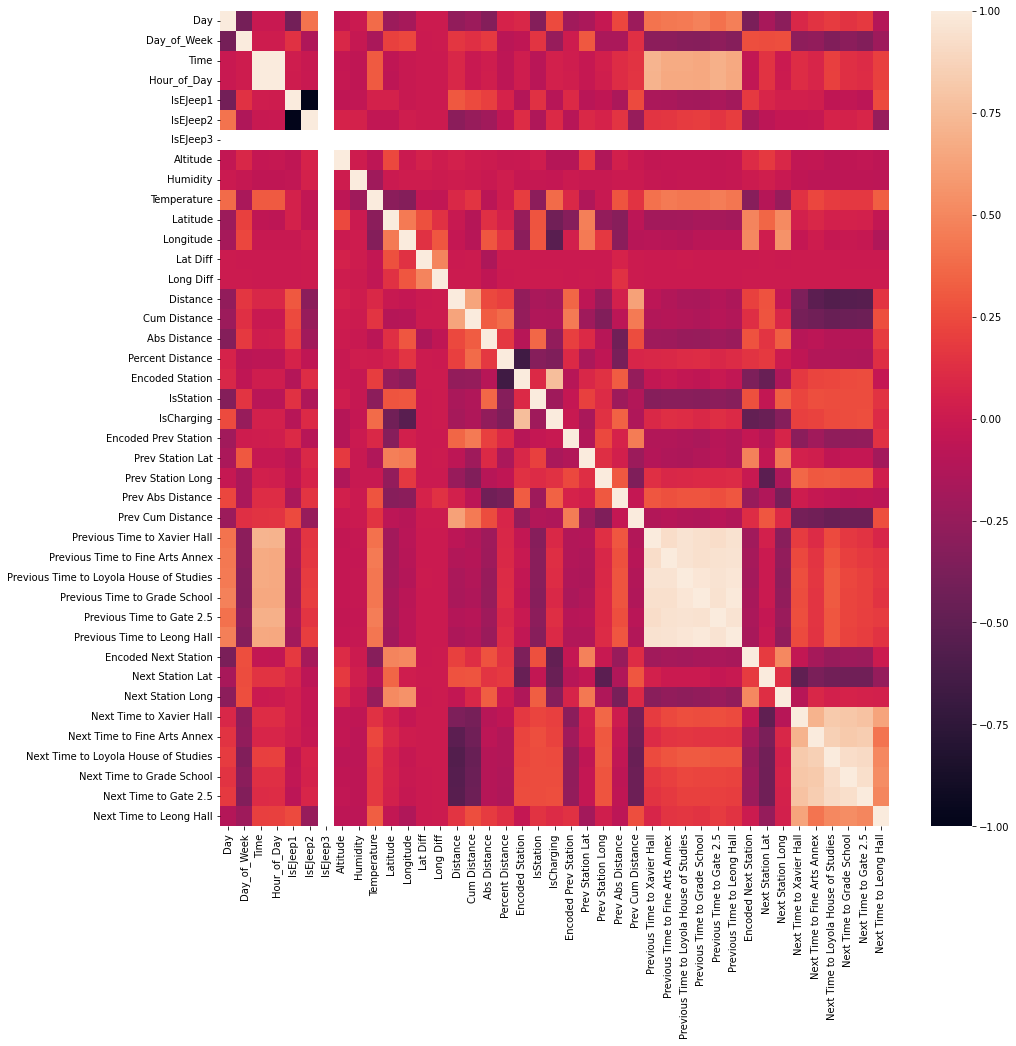

In [5]:
# Get correlations among features
import seaborn as sns
plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr())

In [6]:
X = df.copy()
X = X[X['Day'] <= 20]
X.sort_values(by=['Day', 'Time'], axis=0, inplace=True)

In [7]:
X['Day'].unique()

array([ 4,  9, 10, 12, 14, 15, 16, 17])

In [8]:
X_train = X[X['Day'] < 16]
X_test = X[X['Day'] >= 16]

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train.to_numpy())
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)

X_test_scaled = scaler.transform(X_test.to_numpy())
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

In [ ]:
# X_train = X_scaled[X_scaled['Day'] < scaled_days[-2]]
# X_test = X_scaled[X_scaled['Day'] >= scaled_days[-2]]

In [10]:
# X_train = X[X['Day'] < 16]
# X_test = X[X['Day'] >= 16]

# Xs is X but without the next time columns within it
Xs_train = X_train.copy()
Xs_test = X_test.copy()

Xs_train = Xs_train.drop(columns=['Next Time to Fine Arts Annex', 'Next Time to Loyola House of Studies', 'Next Time to Grade School', 'Next Time to Gate 2.5', 'Next Time to Leong Hall', 'Next Time to Xavier Hall'])
Xs_test = Xs_test.drop(columns=['Next Time to Fine Arts Annex', 'Next Time to Loyola House of Studies', 'Next Time to Grade School', 'Next Time to Gate 2.5', 'Next Time to Leong Hall', 'Next Time to Xavier Hall'])

Y_train = X_train.copy()
Y_test = X_test.copy()

Y_train = Y_train[['Next Time to Fine Arts Annex', 'Next Time to Loyola House of Studies', 'Next Time to Grade School', 'Next Time to Gate 2.5', 'Next Time to Leong Hall', 'Next Time to Xavier Hall', 'IsEJeep1', 'IsEJeep2', 'IsEJeep3']]
Y_train = Y_train.dropna()

Y_test = Y_test[['Next Time to Fine Arts Annex', 'Next Time to Loyola House of Studies', 'Next Time to Grade School', 'Next Time to Gate 2.5', 'Next Time to Leong Hall', 'Next Time to Xavier Hall', 'IsEJeep1', 'IsEJeep2', 'IsEJeep3']]
Y_test = Y_test.dropna()

assert(len(X_train) == len(Y_train))
assert(len(X_test) == len(Y_test))

In [ ]:
X_train

In [11]:
#model_lr = LinearRegression()
#model_lr.fit(X_train, Y_train)

model_s_lr = LinearRegression()
model_s_lr.fit(Xs_train, Y_train)

LinearRegression()

In [ ]:
X_test

In [12]:
df_output = pd.DataFrame(columns=Y_train.columns)
df_s_output = pd.DataFrame(columns=Y_train.columns)

In [ ]:
def daytimestamp_to_time(val: int) -> str:
    h = val // (24 * 60)
    m_s = val % (24 * 60)
    m = m_s // 60
    s = m_s % 60

    return f'{h:02}:{m:02}:{s:02}'

In [ ]:
for index, row in X_test.iterrows():
    y_hat = model_lr.predict(row.to_frame().transpose())
    df_output.loc[len(df_output)] = y_hat[0]

df_output

In [ ]:
df_s_output = pd.DataFrame(columns=Y_train.columns)

for index, row in Xs_test.iterrows():
    y_hat = model_s_lr.predict(row.to_frame().transpose())
    df_s_output.loc[len(df_s_output)] = y_hat[0]

df_s_output

In [ ]:
df_output.to_csv('Linear Reg Output.csv')
df_s_output.to_csv('Linear Reg Spec Output.csv')

In [ ]:
Y_test = Y_test.dropna()
df_output = df_output.dropna()
df_s_output = df_s_output.dropna()

Y_test = Y_test.drop(columns=['IsEJeep1', 'IsEJeep2', 'IsEJeep3'])
df_output = df_output.drop(columns=['IsEJeep1', 'IsEJeep2', 'IsEJeep3'])
df_s_output = df_s_output.drop(columns=['IsEJeep1', 'IsEJeep2', 'IsEJeep3'])



In [13]:
y_pred = model_s_lr.predict(Xs_test)

In [14]:
# Calculating MSE for all columns
# rmse = mean_squared_error(Y_test, df_output, squared=False)
rmse_s = mean_squared_error(Y_test, y_pred, squared=False)

# mae = mean_absolute_error(Y_test, df_output)
mae_s = mean_absolute_error(Y_test, y_pred)

# r2 = r2_score(Y_test, df_output)
r2_s = r2_score(Y_test, y_pred)

# print('With Next Time of Arrival in Train Dataset:')
# print(f'RMSE: {rmse}')
# print(f'R^2: {r2}')
# print(f'MAE: {mae}')

print('WithOUT Next Time of Arrival in Train Dataset:')
print(f'RMSE: {rmse_s}')
print(f'R^2: {r2_s}')
print(f'MAE: {mae_s}')

WithOUT Next Time of Arrival in Train Dataset:
RMSE: 0.19565382566246958
R^2: -0.01577929075997633
MAE: 0.15789188851941097


In [ ]:
print(Y_test.columns, )

In [ ]:
# Do some plotting here

# Y_pred = model_s_lr.predict(Xs_test)

for station in next_station_dict.keys():
    diff_df = df_s_output.subtract(Y_test.reset_index(drop=True))[f'Next Time to {station}']

    plt.figure(figsize=(15, 15))
    plt.plot(Y_test[f'Next Time to {station}'], diff_df, 'o', color='black')
    plt.xlabel('Y_test')
    plt.ylabel('pred - Y_test')
    plt.title(f'Linear Regression: Differences in Next Time of Arrival to {station}')
    plt.show()

# RQ2: PCA and Feature Importance

#### PCA

In [ ]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection

X_pca = X.copy()
Y_pca = X_pca[['Next Time to Fine Arts Annex', 'Next Time to Loyola House of Studies', 'Next Time to Grade School', 'Next Time to Gate 2.5', 'Next Time to Leong Hall', 'Next Time to Xavier Hall']]
X_pca = X_pca.drop(columns=['Next Time to Fine Arts Annex', 'Next Time to Loyola House of Studies', 'Next Time to Grade School', 'Next Time to Gate 2.5', 'Next Time to Leong Hall', 'Next Time to Xavier Hall'])

pca = PCA()
X_reduced = pca.fit_transform(minmax_scale(X_pca))
Y_reduced = pca.fit_transform(minmax_scale(Y_pca))

cv = RepeatedKFold(n_splits=2, n_repeats=1, random_state=0)

reg = LinearRegression()
scores = []

score = -1*model_selection.cross_val_score(reg,
           np.ones((len(X_reduced),1)), Y_reduced, cv=cv,
           scoring='neg_mean_squared_error').mean()    
scores.append(score)

for i in np.arange(1, len(X.columns)):
    score = -1*model_selection.cross_val_score(reg,
               X_reduced[:,:i], Y_reduced, cv=cv, scoring='neg_mean_squared_error').mean()
    scores.append(score)

scores


In [71]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_copy = X.drop(columns=['Next Time to Fine Arts Annex', 'Next Time to Loyola House of Studies', 'Next Time to Grade School', 'Next Time to Gate 2.5', 'Next Time to Leong Hall', 'Next Time to Xavier Hall'])
Y_copy = X[['Next Time to Fine Arts Annex', 'Next Time to Loyola House of Studies', 'Next Time to Grade School', 'Next Time to Gate 2.5', 'Next Time to Leong Hall', 'Next Time to Xavier Hall']]

train_scaler = scaler.fit_transform(X_copy.to_numpy())
Xs = scaler.transform(X_copy.to_numpy())

# Compute PCA
pca = PCA(n_components=0.95)  # Select components explaining 95% variance
X_pca = pca.fit_transform(Xs)

In [82]:


# Evaluate feature importance
loadings = pca.components_
feature_names = X_copy.columns

r2_dict = []

for i in range(0, 100):
    selected_features = []

    threshold = i / 100.0  # Arbitrary threshold for high loadings
    for i, feature in enumerate(feature_names):
        if abs(loadings[0, i]) >= threshold:
            selected_features.append(feature)

    if len(selected_features) == 0:
        break

    X_copy_dropped = X_copy[selected_features]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_copy_dropped, Y_copy, test_size=0.2)

    # Train a logistic regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate model performance on test set
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    r2_dict.append({
        'Threshold': threshold,
        'Feature Count': len(selected_features),
        'R^2': r2
    })

print(r2_dict)

[{'Threshold': 0.0, 'Feature Count': 35, 'R^2': 0.6754163010618424}, {'Threshold': 0.01, 'Feature Count': 30, 'R^2': 0.6709648159039352}, {'Threshold': 0.02, 'Feature Count': 30, 'R^2': 0.669220024228593}, {'Threshold': 0.03, 'Feature Count': 29, 'R^2': 0.6372058615147743}, {'Threshold': 0.04, 'Feature Count': 29, 'R^2': 0.6389686508513454}, {'Threshold': 0.05, 'Feature Count': 29, 'R^2': 0.638854798527974}, {'Threshold': 0.06, 'Feature Count': 26, 'R^2': 0.6017297569111539}, {'Threshold': 0.07, 'Feature Count': 23, 'R^2': 0.5507880443277171}, {'Threshold': 0.08, 'Feature Count': 21, 'R^2': 0.5451964167444895}, {'Threshold': 0.09, 'Feature Count': 21, 'R^2': 0.5456882893200854}, {'Threshold': 0.1, 'Feature Count': 19, 'R^2': 0.46487186078393}, {'Threshold': 0.11, 'Feature Count': 19, 'R^2': 0.46523794097138343}, {'Threshold': 0.12, 'Feature Count': 18, 'R^2': 0.3841504834974579}, {'Threshold': 0.13, 'Feature Count': 17, 'R^2': 0.3802843503141844}, {'Threshold': 0.14, 'Feature Count': 1

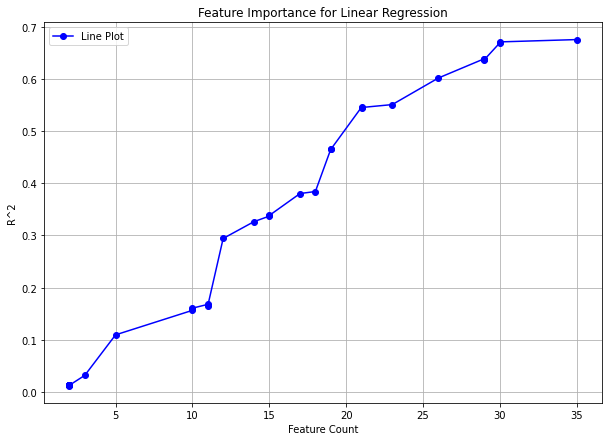

In [83]:
# Graphing each metric for r^2

x_values = [val['Feature Count'] for val in r2_dict]
data = [val['R^2'] for val in r2_dict]

plt.figure(figsize=(10, 7))
plt.plot(x_values, data, marker='o', linestyle='-', color='b', label='Line Plot')
plt.xlabel('Feature Count')
plt.ylabel('R^2')
plt.title('Feature Importance for Linear Regression')
plt.legend()  # Optional: Show legend
plt.grid(True)  # Optional: Show grid
plt.show()

#### Feature Importance: Fisher's Score

In [ ]:
Y_train

In [15]:
from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(Xs_train, Y_train)
importance

ValueError: Unknown label type: continuous-multioutput. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [16]:
from skfeature.function.similarity_based import fisher_score

ranks = fisher_score.fisher_score(X_train.iloc[:, :], Y_train.iloc[:, :])

ranks

InvalidIndexError: (slice(None, None, None), None)

#### Feature Importance

In [ ]:
# Feature Importance
coeffs = model_lr.coef_
coeffs_s = model_s_lr.coef_

columns = X_train.columns
columns_s = Xs_train.columns

coeffs = coeffs.transpose()
coeffs_s = coeffs_s.transpose()

imp_dict = dict()
imp_dict_s = dict()

for i, col in enumerate(columns):
    imp_dict[col] = abs(sum(coeffs[i][:5]) / 6)

for i, col in enumerate(columns_s):
    imp_dict_s[col] = abs(sum(coeffs_s[i][:5]) / 6)

imp_dict = sorted(imp_dict.items(), key=lambda x:x[1])
imp_dict_s = sorted(imp_dict_s.items(), key=lambda x:x[1])

In [ ]:
imp_dict_s

In [ ]:
lol = imp_dict_s.copy()

labels = [x for x, y in lol]
values = [y for x, y in lol]

print(labels)

plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.bar(labels, values, color='blue', label='Bar Plot')
plt.xlabel('Feature')
plt.ylabel('Weight Consultation')

plt.xticks(range(len(labels)), labels, rotation='vertical')
plt.title('Feature Importance Weight by Feature')
plt.legend()  # Optional: Show legend
plt.grid(axis='y')  # Optional: Show grid on the y-axis
plt.show()

In [ ]:
X_train_feat_imp = X_train.copy()
Xs_train_feat_imp = Xs_train.copy()
Y_train_feat_imp = Y_train.copy()

X_test_feat_imp = X_test.copy()
Xs_test_feat_imp = Xs_test.copy()
Y_test_feat_imp = Y_test.copy()


In [ ]:
Y_train_feat_imp = Y_train_feat_imp.drop(columns=['IsEJeep1', 'IsEJeep2', 'IsEJeep3'])

In [ ]:
# Drop the 3 lowest features according to the coefficients, retrain model, then get RMSE
feat_imp_metrics = []
feat_imp_metrics_s = []

while len(imp_dict) > 0:
    to_drop = imp_dict[:1]

    to_drop = [col for col, val in to_drop]
    X_train_feat_imp = X_train_feat_imp.drop(columns=to_drop)
    X_test_feat_imp = X_test_feat_imp.drop(columns=to_drop)

    if len(X_train_feat_imp.columns) <= 0:
        break

    new_model = LinearRegression()
    new_model.fit(X_train_feat_imp, Y_train_feat_imp)

    Y_pred = new_model.predict(X_test_feat_imp)

    rmse = mean_squared_error(Y_test_feat_imp, Y_pred[:len(df_output) - 1], squared=False)
    mae = mean_absolute_error(Y_test_feat_imp, Y_pred[:len(df_output) - 1])
    r2 = r2_score(Y_test_feat_imp, Y_pred[:len(df_output) - 1])

    feat_imp_metrics.append({
        'Feature Count': len(X_train_feat_imp.columns),
        'Features Dropped': to_drop,
        'RMSE': rmse,
        'MAE': mae,
        'R^2': r2
    })

    imp_dict = imp_dict[1:]

feat_imp_metrics


In [ ]:
feat_imp_metrics_s = []

while len(imp_dict_s) > 0:
    to_drop = imp_dict_s[:1]

    to_drop = [col for col, val in to_drop]
    Xs_train_feat_imp = Xs_train_feat_imp.drop(columns=to_drop)
    Xs_test_feat_imp = Xs_test_feat_imp.drop(columns=to_drop)

    if len(Xs_train_feat_imp.columns) <= 0:
        break

    new_model = LinearRegression()
    new_model.fit(Xs_train_feat_imp, Y_train_feat_imp)

    Y_pred = new_model.predict(Xs_test_feat_imp)

    rmse = mean_squared_error(Y_test_feat_imp, Y_pred, squared=False)
    mae = mean_absolute_error(Y_test_feat_imp, Y_pred)
    r2 = r2_score(Y_test_feat_imp, Y_pred)

    feat_imp_metrics_s.append({
        'Feature Count': len(Xs_train_feat_imp.columns),
        'Features Dropped': to_drop,
        'RMSE': rmse,
        'MAE': mae,
        'R^2': r2
    })

    imp_dict_s = imp_dict_s[1:]

feat_imp_metrics_s

In [ ]:
# Graphing each metric for r^2
overall_data = [(val['Feature Count'], val['R^2']) for val in feat_imp_metrics_s]
overall_data = overall_data[::-1]

x_values = [x for x, y in overall_data]
data = [y for x, y in overall_data]

plt.figure(figsize=(10, 7))
plt.plot(x_values, data, marker='o', linestyle='-', color='b', label='Line Plot')
plt.xlabel('Feature Count')
plt.ylabel('R^2')
plt.title('Feature Importance for Linear Regression')
plt.legend()  # Optional: Show legend
plt.grid(True)  # Optional: Show grid
plt.show()

# RQ3: Autoencoders

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Input, Dense

In [ ]:
# Setting up train and test data
X_train_ae = X_train.copy()
Xs_train_ae = Xs_train.copy()
Y_train_ae = Y_train.copy()

X_test_ae = X_test.copy()
Xs_test_ae = Xs_test.copy()
Y_test_ae = Y_test.copy()

Y_train_ae = Y_train_ae.drop(columns=['IsEJeep1', 'IsEJeep2', 'IsEJeep3'])

In [ ]:
input_dim = X_train_ae.shape[1]

print((input_dim,))

In [ ]:
# Define the autoencoder architecture
# from keras import Model
from tensorflow import keras
#from keras.models import Sequential
#from keras.layers import Input, Dense

input_dim = X_train_ae.shape[1]
input_s_dim = Xs_train_ae.shape[1]

encoding_dim = 2

# Set the encoding dimension
input_layer = keras.layers.Input(shape=(input_dim,))
input_layer_s = keras.layers.Input(shape=(input_s_dim, ))

encoder = keras.layers.Dense(encoding_dim, activation="relu")(input_layer)
encoder_s = keras.layers.Dense(encoding_dim, activation="relu")(input_layer_s)

decoder = keras.layers.Dense(input_dim, activation="sigmoid")(encoder)
decoder_s = keras.layers.Dense(input_s_dim, activation="sigmoid")(encoder_s)

autoencoder = keras.Model(inputs=input_layer, outputs=decoder)
autoencoder_s = keras.Model(inputs=input_layer_s, outputs=decoder_s)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder_s.compile(optimizer='adam', loss='mse')

# Summary of the autoencoder architecture
autoencoder.summary()
autoencoder_s.summary()

In [ ]:
from tensorflow import keras

input_dim = Xs_train_ae.shape[1]

visible = keras.layers.Input(shape=(input_dim,))


In [ ]:
autoencoder.fit(X_train_ae, X_train_ae, epochs=100, batch_size=32, shuffle=True, validation_data=(X_test_ae, X_test_ae))

In [ ]:
autoencoder_s.fit(Xs_train_ae, Xs_train_ae, epochs=100, batch_size=32, shuffle=True, validation_data=(Xs_test_ae, Xs_test_ae))

In [ ]:
# Use encoder part of the autoencoder for feature selection
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)
encoder_s = Model(inputs=autoencoder_s.input, outputs=autoencoder_s.layers[1].output)

encoded_features_train = encoder.predict(X_train_ae)
encoded_features_test = encoder.predict(X_test_ae)

encoded_features_train_s = encoder_s.predict(Xs_train_ae)
encoded_features_test_s = encoder_s.predict(Xs_test_ae)

# Display the shape of extracted features
print("Encoded Features Shape (Train):", encoded_features_train.shape)
print("Encoded Features Shape (Test):", encoded_features_test.shape)

print("S Encoded Features Shape (Train):", encoded_features_train_s.shape)
print("S Encoded Features Shape (Test):", encoded_features_test_s.shape)

In [ ]:
# Fit a logistic regression model using the selected features
ae_model = LinearRegression()
ae_model.fit(encoded_features_train, Y_train_ae)

ae_model_s = LinearRegression()
ae_model_s.fit(encoded_features_train_s, Y_train_ae)

# Make predictions on the test set
y_pred = ae_model.predict(encoded_features_test)
ys_pred = ae_model_s.predict(encoded_features_test_s)

# Calculate accuracy
rmse = mean_squared_error(Y_test, y_pred, squared=False)
rmse_s = mean_squared_error(Y_test, ys_pred, squared=False)

mae = mean_absolute_error(Y_test, ys_pred)
mae_s = mean_absolute_error(Y_test, ys_pred)

r2 = r2_score(Y_test, ys_pred)
r2_s = r2_score(Y_test, ys_pred)

print('With Next Time of Arrival in Train Dataset:')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')
print(f'MAE: {mae}')

print('WithOUT Next Time of Arrival in Train Dataset:')
print(f'RMSE: {rmse_s}')
print(f'R^2: {r2_s}')
print(f'MAE: {mae_s}')

